## 災害データ分析とストーリーテリング

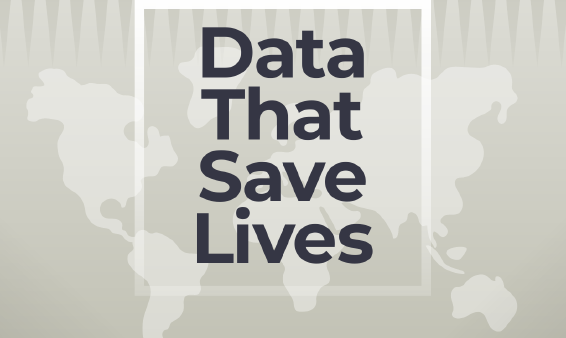
#### **チャレンジの目的**

このチャレンジでは、EM-DAT災害データセットのデータを使ってストーリーを伝える.ipynbファイルを作成します。あなたの独自の視点からデータを分析し、有意義な洞察を導き出し、それを簡潔かつ効果的に視覚的に表現することが目標です。Be creative!

#### **データセットの概要**
https://www.emdat.be/


#### **提出物**

1. **提出物の形式**:
   - Jupyter Notebook (.ipynb) ファイル
   - Markdownセルを使用して、分析の説明、洞察、結論を含むストーリーを伝える。ブログ投稿のように構成すると良いでしょう！
   - コードセルを使用して、データの読み込み、前処理、分析、可視化を行う。
   - Notebook内で生成されたグラフやチャートを含める。
   - 必ず自分のやっていること、感想、学んだことを説明する。

2. **提出方法**:
   - GitHubリポジトリにNotebookをコミットする
   - UNIPAにNotebookのリンクを提出する

3. **締め切り**:
   - 次回のクラス開始前までに提出すること



#### **要件**
1. **フォーカスエリア**:
   - 興味に基づいて**フォーカスエリア**を選択する（例: 災害の種類、死者数、人への影響、地域分析、または時間的トレンド）。

2. **分析**:
   - 計算やデータ探索を通じて、少なくとも**3つの重要な洞察**を提供する。
   - 興味深い統計（種類・地域別の数とか）、トレンド、または異常値を特定する。

3. **可視化**:
   - 分析をサポートする**少なくとも2つの可視化**を作成する。
   - 関連性があり解釈しやすいチャート（例: 棒グラフ、折れ線グラフ、散布図、ヒートマップ）を使用する。

4. **サマリー**:
   - 発見した内容を簡潔にまとめ、その重要性を説明する。



## まずはデータの読み込みから

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

In [2]:
# Explore the data
emdat.head()  # Display the first few rows

,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## ここからはあなたの分析

以下はあくまでも例：

In [3]:
# Ranking by total deaths
death_ranking = emdat.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False)
print("Top 10 countries by total deaths from disasters:")
print(death_ranking.head(10))

Top 10 countries by total deaths from disasters:
Country
China           12522453.0
India            9138244.0
Soviet Union     3857423.0
Bangladesh       2994475.0
Ethiopia          417252.0
Haiti             253200.0
Indonesia         243370.0
Japan             239761.0
Uganda            207817.0
Niger             196580.0
Name: Total Deaths, dtype: float64


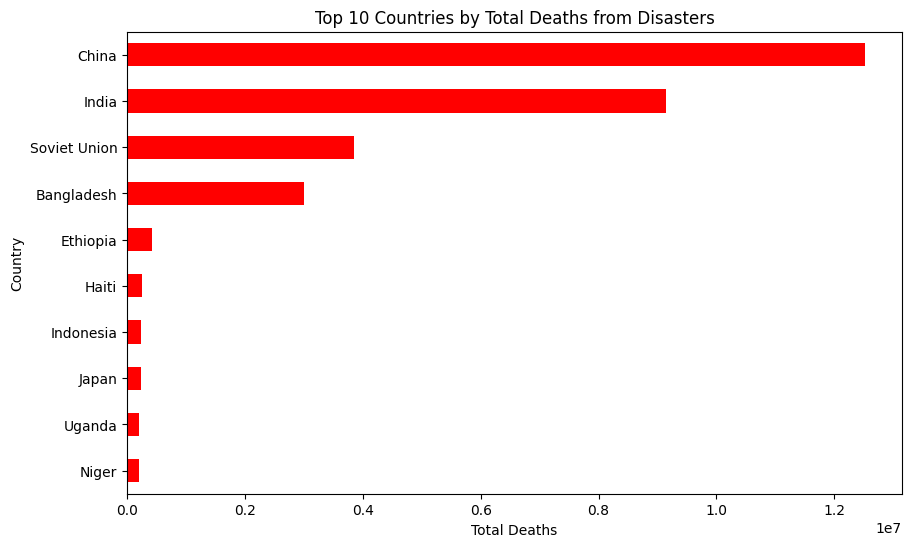

In [4]:
# ranking of total deaths in horizontal bar chart, top 10 countries, highest first 
top_10_deaths = death_ranking.head(10)
plt.figure(figsize=(10, 6))
top_10_deaths.plot(kind='barh', color='red')
plt.xlabel('Total Deaths')
plt.title('Top 10 Countries by Total Deaths from Disasters')
plt.gca().invert_yaxis()  # Highest first
plt.show()

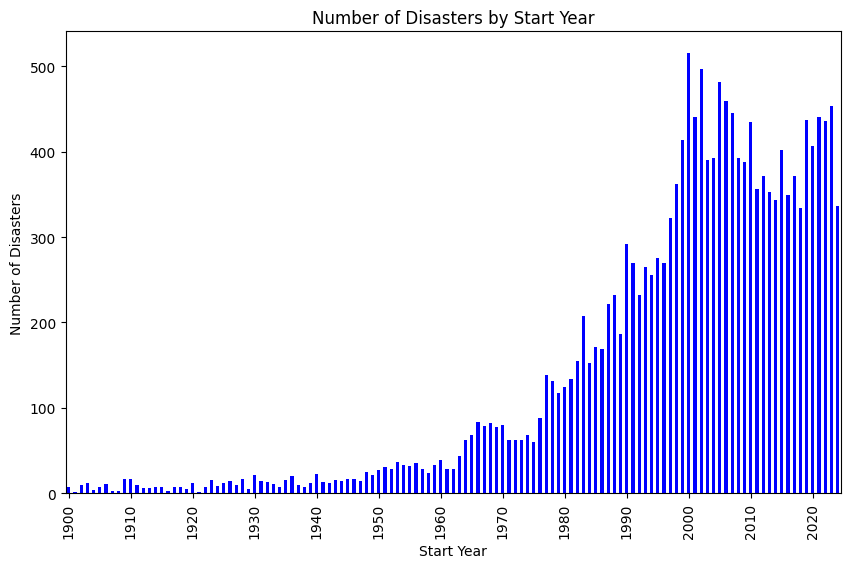

In [5]:
# disasters by year
disasters_by_year = emdat.groupby('Start Year').size()
plt.figure(figsize=(10, 6))
disasters_by_year.plot(kind='bar', color='blue')

# label only every 10 years on x-axis
plt.xticks(ticks=range(0, len(disasters_by_year), 10), labels=disasters_by_year.index[::10])   
plt.xlabel('Start Year')
plt.ylabel('Number of Disasters')
plt.title('Number of Disasters by Start Year')
plt.show()

C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\1129006881.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\1129006881.py:53: UserWarning: Glyph 32207 (\N{CJK UNIFIED IDEOGRAPH-7DCF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\1129006881.py:53: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\1129006881.py:53: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\1129006881.py:53: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\

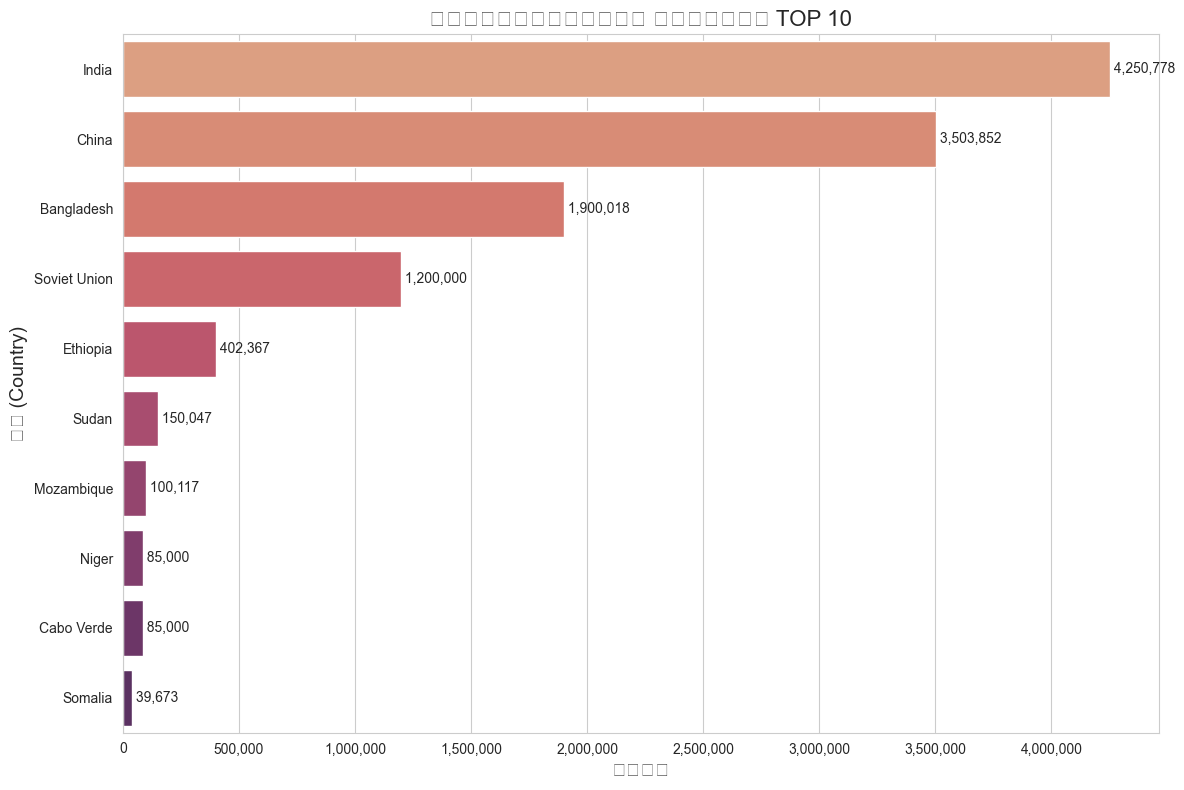

In [6]:
import pandas as pd
import japanize_matplotlib # 日本語表示のため
import matplotlib.pyplot as plt
import seaborn as sns

# データの読み込み
df = pd.read_csv('emdat.csv')

# --- 1. データのフィルタリングと集計 ---

# Disaster Subgroupが 'Climatological' の行のみを抽出
climatological_df = df[df['Disaster Subgroup'] == 'Climatological'].copy()

# 必要な列を抽出: 'Country' と 'Total Deaths'
df_clean = climatological_df[['Country', 'Total Deaths']].dropna()

# 'Total Deaths'列を数値型に変換し、NaNを削除
df_clean['Total Deaths'] = pd.to_numeric(df_clean['Total Deaths'], errors='coerce')
df_clean = df_clean.dropna(subset=['Total Deaths'])

# 'Country'ごとに 'Total Deaths' の合計を計算し、死者数の多い順にソートしてTOP 10を抽出
death_toll_by_country_top10 = df_clean.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(10)

# --- 2. 棒グラフの作成 ---

# グラフのスタイル設定
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) # グラフのサイズを設定

# 棒グラフの描画
ax = sns.barplot(
    x=death_toll_by_country_top10.values, # 死者数（Values）
    y=death_toll_by_country_top10.index,  # 国名（Index）
    palette="flare" # 色のパレット
)

# グラフのタイトルとラベル
plt.title('気候学的災害による総死者数 国別ランキング TOP 10', fontsize=16)
plt.xlabel('総死者数', fontsize=14)
plt.ylabel('国名 (Country)', fontsize=14)

# x軸の目盛りを分かりやすくするために、カンマ区切りでフォーマット
ax.ticklabel_format(style='plain', axis='x')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# 棒の上に死者数を直接表示 (データラベルの追加)
for i, (value, name) in enumerate(zip(death_toll_by_country_top10.values, death_toll_by_country_top10.index)):
    ax.text(value, i, f' {value:,.0f}', va='center', ha='left', fontsize=10)


# グラフのレイアウト調整と表示
plt.tight_layout()
plt.show()

In [5]:
pip install japanize-matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: C:\Users\gatai\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\4030498670.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\4030498670.py:61: UserWarning: Glyph 32207 (\N{CJK UNIFIED IDEOGRAPH-7DCF}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\4030498670.py:61: UserWarning: Glyph 27515 (\N{CJK UNIFIED IDEOGRAPH-6B7B}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\4030498670.py:61: UserWarning: Glyph 32773 (\N{CJK UNIFIED IDEOGRAPH-8005}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\Temp\ipykernel_31592\4030498670.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\gatai\AppData\Local\

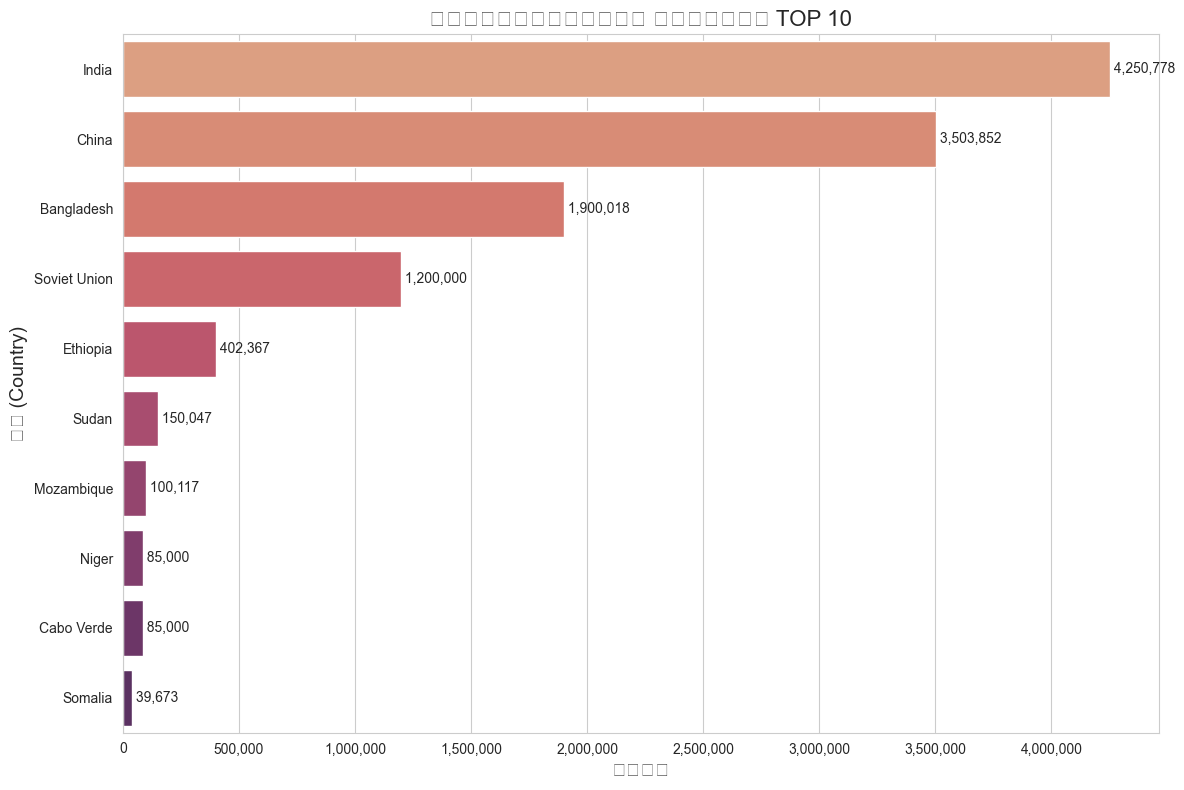

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

# --- 日本語フォント設定（方法 1）---
# 多くの環境で利用可能なフォントを指定します。
# 環境にこのフォントがない場合、Windowsなら 'Yu Gothic' や 'Meiryo'、Macなら 'Hiragino Sans' を試してください。
FONT_NAME = 'IPAexGothic' 
plt.rcParams['font.family'] = FONT_NAME
plt.rcParams['axes.unicode_minus'] = False # 負の符号（-）を正しく表示

# データの読み込み
df = pd.read_csv('emdat.csv')

# --- 1. データのフィルタリングと集計 ---

# Disaster Subgroupが 'Climatological' の行のみを抽出
climatological_df = df[df['Disaster Subgroup'] == 'Climatological'].copy()

# 必要な列を抽出: 'Country' と 'Total Deaths'
df_clean = climatological_df[['Country', 'Total Deaths']].dropna()

# 'Total Deaths'列を数値型に変換し、NaNを削除
df_clean['Total Deaths'] = pd.to_numeric(df_clean['Total Deaths'], errors='coerce')
df_clean = df_clean.dropna(subset=['Total Deaths'])

# 'Country'ごとに 'Total Deaths' の合計を計算し、死者数の多い順にソートしてTOP 10を抽出
death_toll_by_country_top10 = df_clean.groupby('Country')['Total Deaths'].sum().sort_values(ascending=False).head(10)

# --- 2. 棒グラフの作成 ---

# グラフのスタイル設定
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8)) # グラフのサイズを設定

# 棒グラフの描画
ax = sns.barplot(
    x=death_toll_by_country_top10.values, # 死者数（Values）
    y=death_toll_by_country_top10.index,  # 国名（Index）
    palette="flare" # 色のパレット
)

# グラフのタイトルとラベル
# 日本語フォント設定により、ここが正しく表示されます
plt.title('気候学的災害による総死者数 国別ランキング TOP 10', fontsize=16)
plt.xlabel('総死者数', fontsize=14)
plt.ylabel('国名 (Country)', fontsize=14)

# x軸の目盛りを分かりやすくするために、カンマ区切りでフォーマット
ax.ticklabel_format(style='plain', axis='x')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# 棒の上に死者数を直接表示 (データラベルの追加)
for i, (value, name) in enumerate(zip(death_toll_by_country_top10.values, death_toll_by_country_top10.index)):
    ax.text(value, i, f' {value:,.0f}', va='center', ha='left', fontsize=10)


# グラフのレイアウト調整と表示
plt.tight_layout()
plt.show()

findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.


findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not found.
findfont: Font family 'Arial Unicode MS' not found.
findfont: Font family 'Hiragino Maru Gothic Pro' not

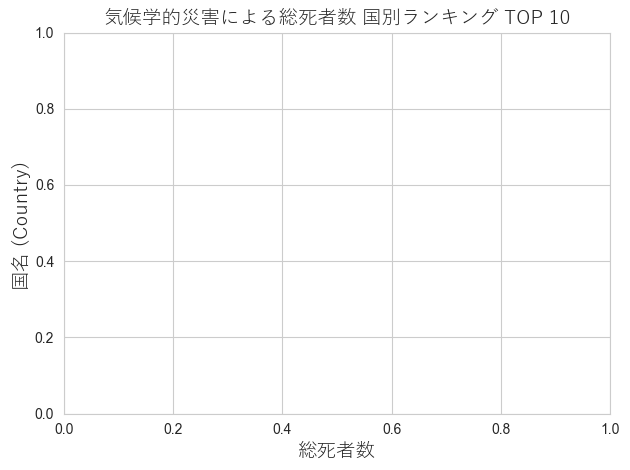

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties # 💡 この行を追加

# --- 💡 日本語フォント設定を追加 ---
# 使用するフォント名 (ご自身の環境に合わせて変更してください)
# 例: 'Arial Unicode MS', 'Hiragino Maru Gothic Pro', 'Yu Gothic' など
jp_font = FontProperties(family=['Arial Unicode MS', 'Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meiryo'], size=14) 
# 'Arial Unicode MS' は多くの環境で日本語に対応していることが多いフォントです
# 複数のフォントをリストで指定することで、最初のフォントが見つからない場合に次のフォントを試すことができます。
# -----------------------------------

# (データの準備とプロットのコードは省略)

# グラフのタイトルとラベルにフォントを適用
plt.title('気候学的災害による総死者数 国別ランキング TOP 10', fontsize=16, fontproperties=jp_font) # 💡 fontproperties=jp_font を追加
plt.xlabel('総死者数', fontsize=14, fontproperties=jp_font) # 💡 fontproperties=jp_font を追加
plt.ylabel('国名 (Country)', fontsize=14, fontproperties=jp_font) # 💡 fontproperties=jp_font を追加

# x軸の目盛りを分かりやすくするために、カンマ区切りでフォーマット

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# 棒の上に死者数を直接表示 (データラベルの追加)
for i, (value, name) in enumerate(zip(death_toll_by_country_top10.values, death_toll_by_country_top10.index)):
    ax.text(value, i, f' {value:,.0f}', va='center', ha='left', fontsize=10, fontproperties=jp_font) # 💡 fontproperties=jp_font を追加

# グラフのレイアウト調整と表示
plt.tight_layout()
plt.show()